In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm

from sklearn.metrics import r2_score
%matplotlib inline

<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

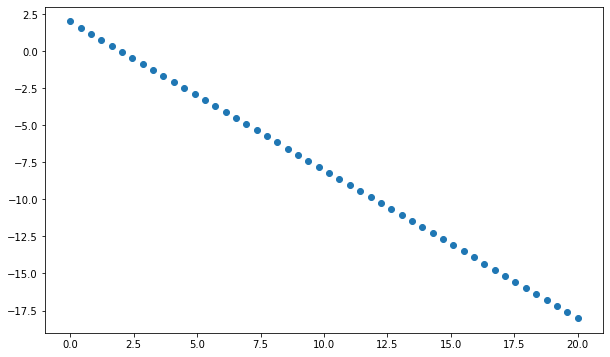

In [4]:
plt.figure(figsize=(10,6))
plt.scatter(X, y);

In [5]:
def plot_visuals(losses, thetas_0, thetas_1):
    plt.figure(figsize=(15,20))

    plt.subplot(411)
    plt.plot(losses, marker='o')
    plt.xlabel('iteration')
    plt.ylabel('Loss')
    plt.grid('True');

    plt.subplot(412)
    plt.plot(thetas_0, losses, marker='o')
    plt.xlabel('Theta 0')
    plt.ylabel('Loss')
    plt.title('Learning Rate = 0.0005')
    plt.grid('True')

    plt.subplot(413)
    plt.plot(thetas_1, losses, marker='o')
    plt.xlabel('Theta 1',)
    plt.ylabel('Loss')
    plt.title('Learning Rate = 0.0005')
    plt.grid('True')

    plt.subplot(414)
    plt.scatter(X, y)
    plt.plot(X, h_x, 'r');

###  Momentum-Based GD

#### γ-->(gamma)  takes values between 0 and 1.

In [7]:
def Momentum_GD_SingleVariable(X, y, alpha, max_num_iterations, gamma):
    theta_0, theta_1 = 0,0
    loss = []
    theta_0s = []
    theta_1s = []
    h_xs=[]
    m = len(y)
    v0, v1 = 0,0

    for i in tqdm(range(max_num_iterations)):
        #print(f'****************** Iteration {i} ********************\n')

        theta_0s.append(theta_0)
        theta_1s.append(theta_1)
        
        h_x = theta_0+theta_1*X
        h_xs.append(h_x)
        #print('h(x) : ', h_x)

        error_vector = (h_x - y)
        #print('\nError Vector :\n', error_vector)

        MSE = np.sum(error_vector**2) / (2*m)
        loss.append(MSE)
        #print('\nj = ', MSE)

        d_theta_0 = (np.sum(h_x - y))/m
        d_theta_1 = (np.sum((h_x - y) *X))/m

        gradient_vector = np.array([d_theta_0, d_theta_1])
        #print('\nGradient Vector : \n', gradient_vector)

        gradient_vec_norm = np.linalg.norm(gradient_vector)
        #print('\n Gradient Vector Norm : ', gradient_vec_norm)
    
        if i>0:
            if gradient_vec_norm <=0.001 or (np.abs(loss[-1] - loss[-2]))<=0.001:
                print('****************** Training Report ********************')
                print(f'Gradient Descent converged after {i} iterations')
                print('theta_0_Opt : ', theta_0)
                print('theta_1_Opt : ', theta_1)
                #print('\nError Vector :\n', error_vector)
                print('Cost = ', MSE)
                #print('h(x) = y_predict: \n', h_x)
                #print('y_actual : ', y)

                break

       
        v0 = v0*gamma + d_theta_0*alpha
        v1 = v1*gamma + d_theta_1*alpha
        
        theta_0 = theta_0 - v0
        theta_1 = theta_1 - v1
#         print('theta_0_new : ', theta_0)
#         print('theta_1_new : ', theta_1)
        
        
    return loss, theta_0s, theta_1s, h_xs


##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [8]:
loss, theta_0s, theta_1s, h_xs = Momentum_GD_SingleVariable(X, y, alpha=0.0005, gamma=0.5, max_num_iterations=300)

  0%|▎                                                                                 | 1/300 [00:00<01:05,  4.56it/s]

****************** Training Report ********************
Gradient Descent converged after 30 iterations
theta_0_Opt :  -0.04735972918207644
theta_1_Opt :  -0.8431668394470035
Cost =  0.5414103841082126


In [13]:
h_x = theta_0s[-1] + theta_1s[-1]*X
r2_score(h_x, y)

0.9560987688667196

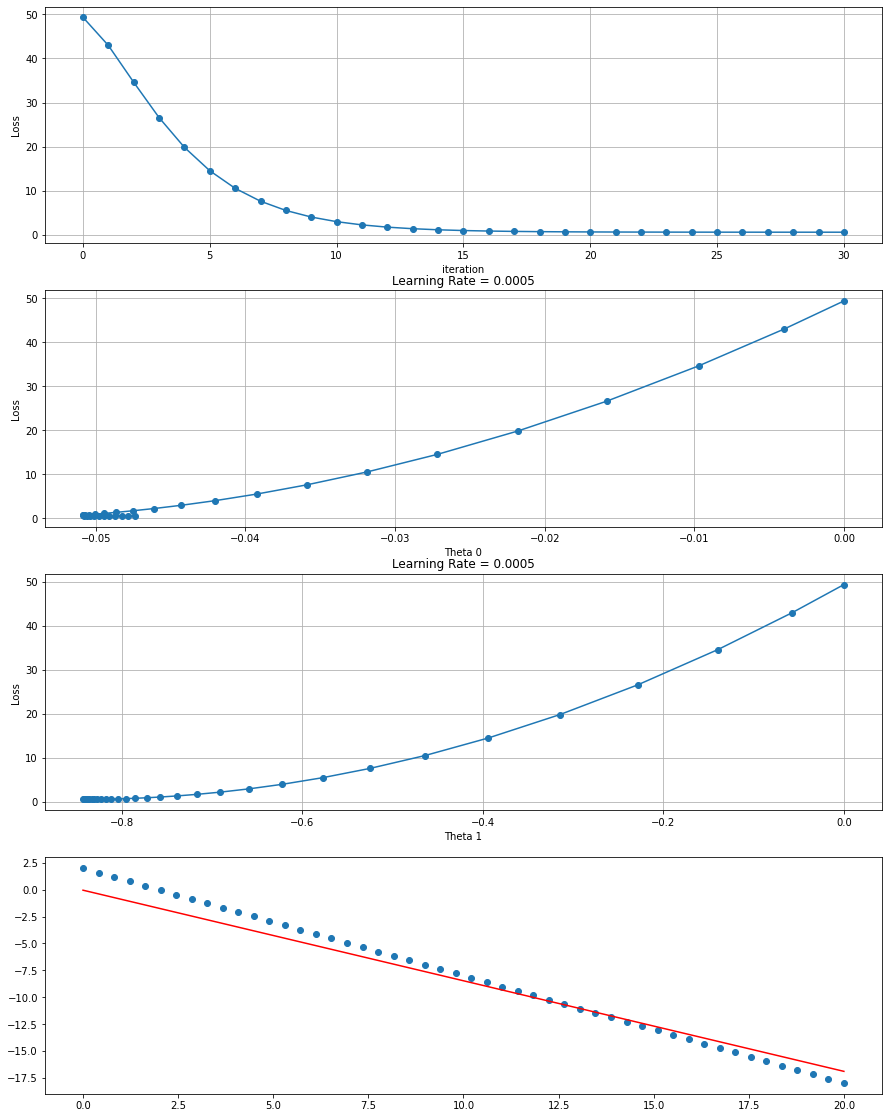

In [14]:
plot_visuals(loss, theta_0s, theta_1s)

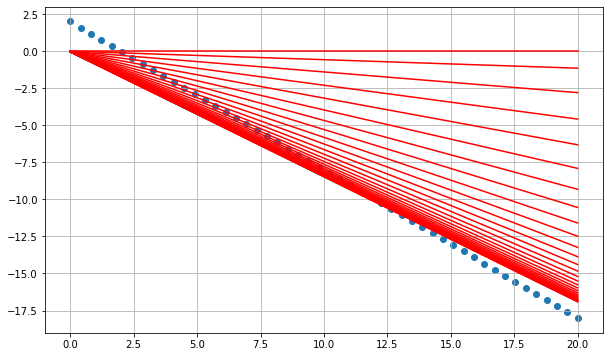

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx,'r')
    plt.grid(True);

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [16]:
loss,theta_0s, theta_1s, h_xs = Momentum_GD_SingleVariable(X, y, alpha=0.0005, gamma=0.9, max_num_iterations=300)

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

****************** Training Report ********************
Gradient Descent converged after 79 iterations
theta_0_Opt :  0.11535974085878035
theta_1_Opt :  -0.8633084968227093
Cost =  0.45813974603162605


In [17]:
hx = theta_0s[-1] + theta_1s[-1]*X
r2_score(y, hx)

0.973589591111118

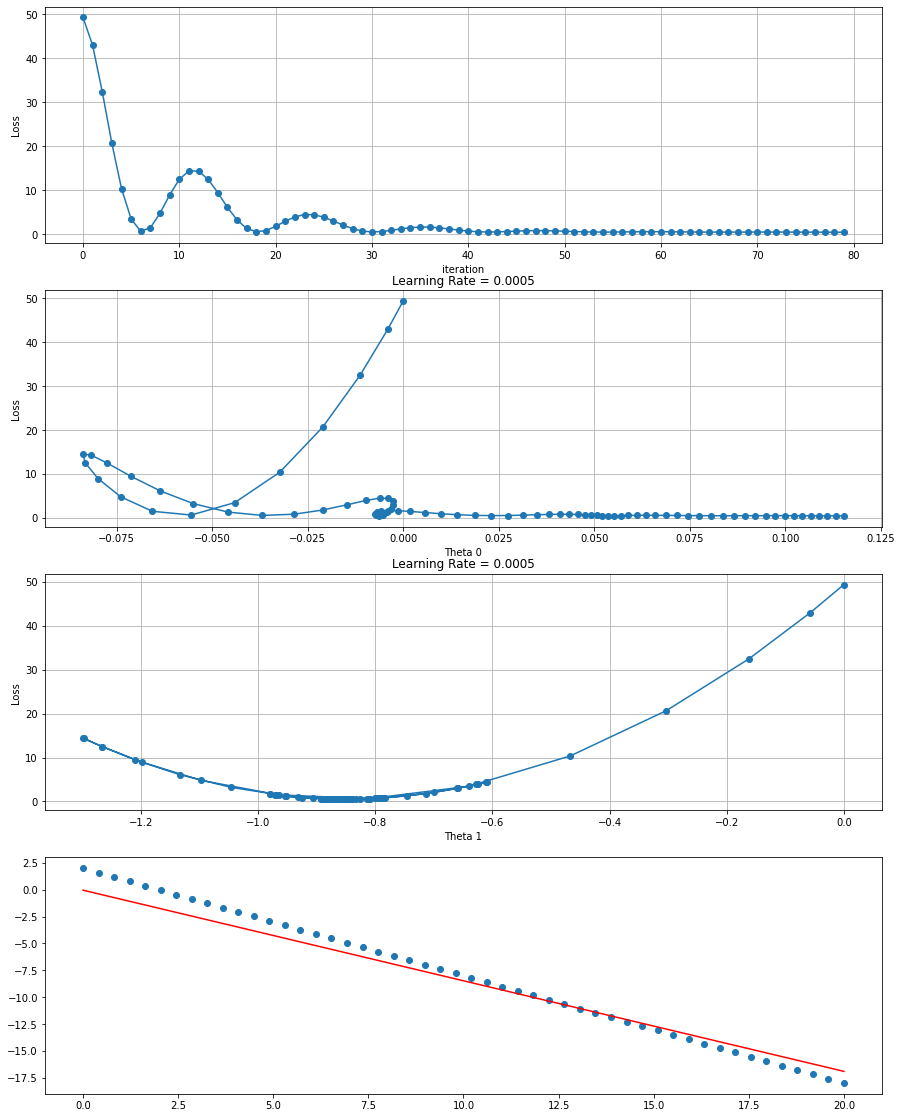

In [18]:
plot_visuals(loss, theta_0s, theta_1s)

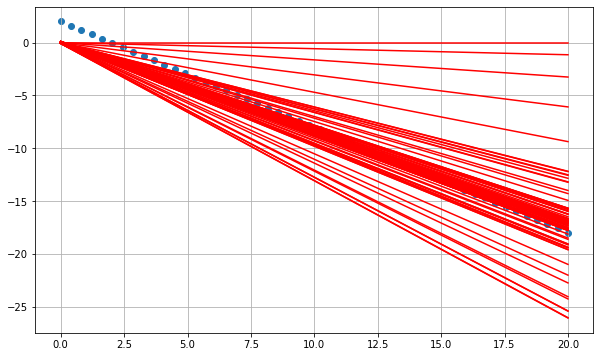

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx,'r')
    plt.grid(True);

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [19]:
loss, theta_0s, theta_1s, h_xs = Momentum_GD_SingleVariable(X, y, alpha=0.0005, gamma=0.89, max_num_iterations=300)

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

****************** Training Report ********************
Gradient Descent converged after 67 iterations
theta_0_Opt :  0.07510910879253059
theta_1_Opt :  -0.8532902805303634
Cost =  0.4781585652791919


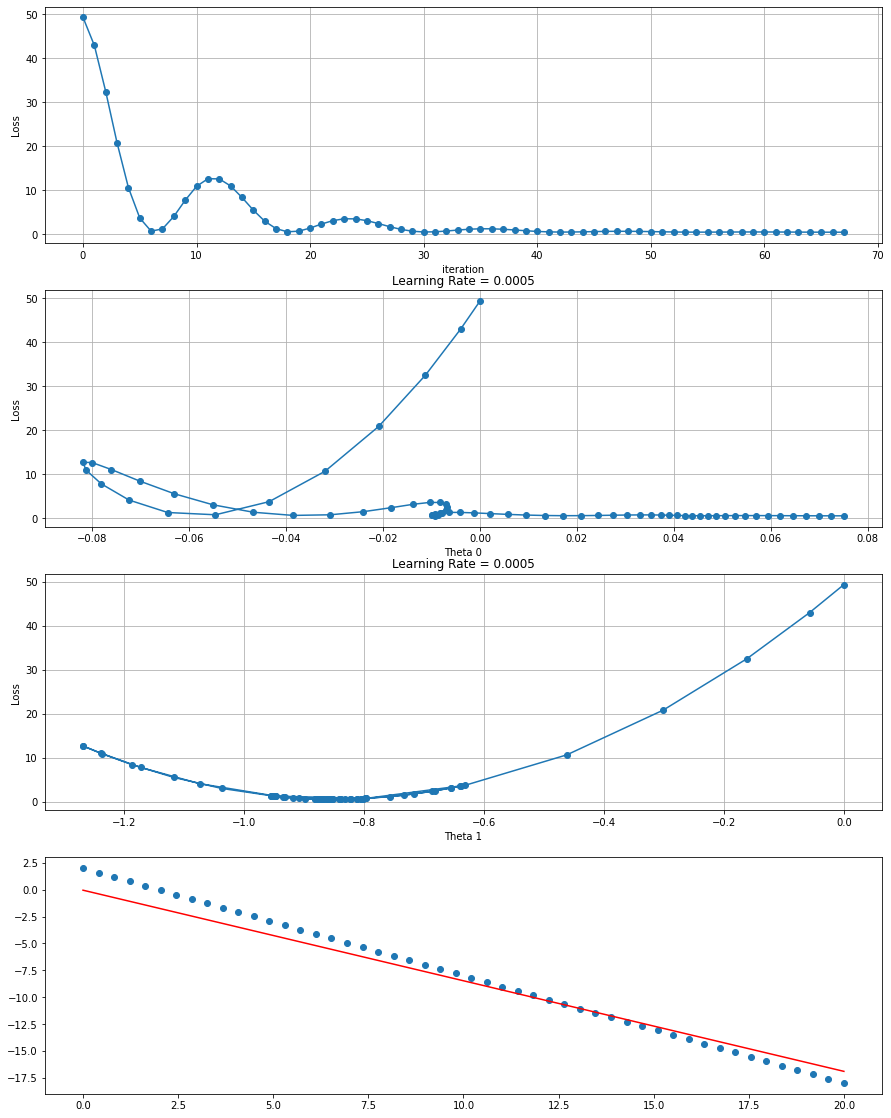

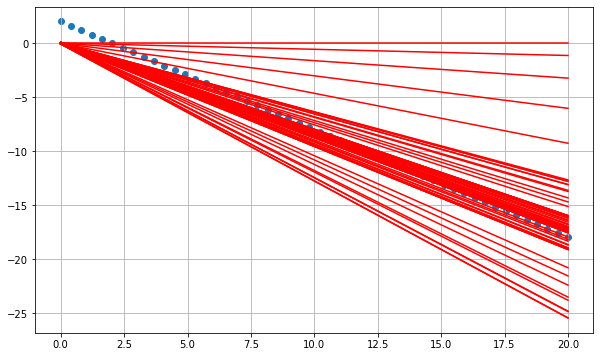

In [20]:
plot_visuals(loss, theta_0s, theta_1s)
plt.figure(figsize=(10,6))
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx,'r')
    plt.grid(True);

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [41]:
loss, theta_0s, theta_1s, h_xs = Momentum_GD_SingleVariable(X, y, alpha=0.00005, gamma=0.9, max_num_iterations=300)

  0%|                                                                                          | 0/300 [00:00<?, ?it/s]

****************** Training Report ********************
Gradient Descent converged after 34 iterations
theta_0_Opt :  -0.056767336438233035
theta_1_Opt :  -0.8532686863588871
Cost =  0.5472090788509116


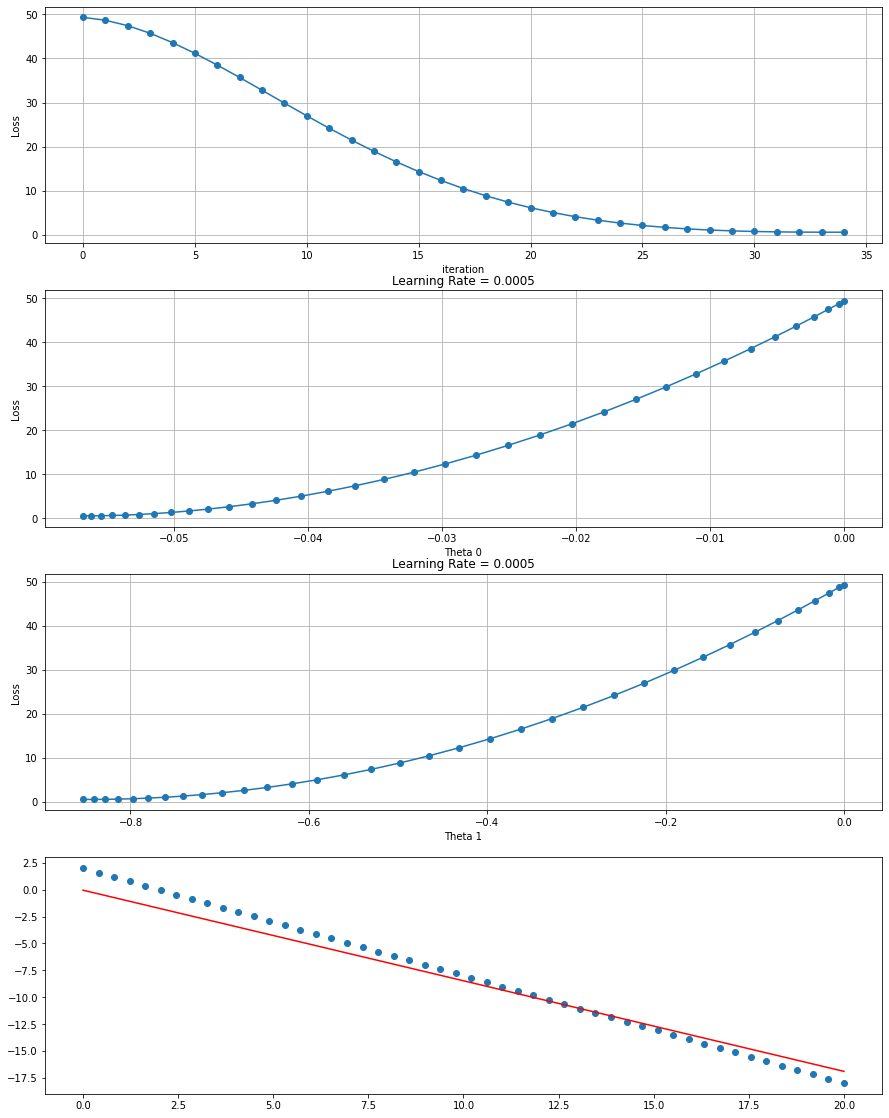

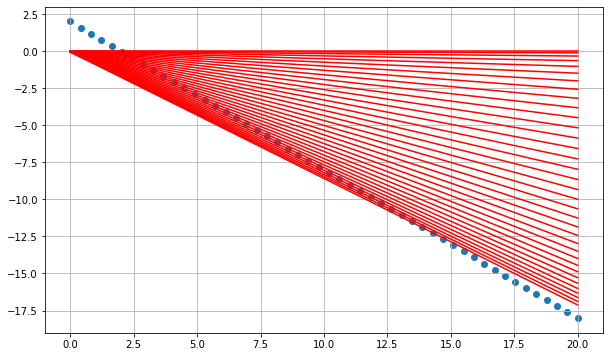

In [42]:
plot_visuals(loss, theta_0s, theta_1s)
plt.figure(figsize=(10,6))
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx,'r')
    plt.grid(True);

### NAG

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [44]:
def MomentumNAG_GD_SingleVariable(X, y, alpha, max_num_iterations, gamma):
    theta_0, theta_1 = 0,0
    loss = []
    theta_0s = []
    theta_1s = []
    h_xs=[]
    m = len(y)
    v0, v1 = 0,0

    for i in range(max_num_iterations):
#         print(f'****************** Iteration {i} ********************\n')

        theta_0s.append(theta_0)
        theta_1s.append(theta_1)
        
        theta_temp0 = theta_0 - gamma*v0
        theta_temp1 = theta_1 - gamma*v1
        
        h_x = theta_temp0+theta_temp1*X
        h_xs.append(h_x)
#         print('h(x) : ', h_x)

        error_vector = (h_x - y)
#         print('\nError Vector :\n', error_vector)

        MSE = np.sum(error_vector**2) / (2*m)
        loss.append(MSE)
#         print('\nj = ', MSE)

        d_theta_0 = (np.sum(h_x - y))/m
        d_theta_1 = (np.sum((h_x - y) *X))/m

        gradient_vector = np.array([d_theta_0, d_theta_1])
#         print('\nGradient Vector : \n', gradient_vector)

        gradient_vec_norm = np.linalg.norm(gradient_vector)
#         print('\n Gradient Vector Norm : ', gradient_vec_norm)
    
        if i>0:
            if gradient_vec_norm <=0.001 or (np.abs(loss[-1] - loss[-2]))<=0.001:
                print('****************** Training Report ********************')
                print(f'Gradient Descent converged after {i} iterations')
                print('theta_0_Opt : ', theta_0)
                print('theta_1_Opt : ', theta_1)
#                 print('\nError Vector :\n', error_vector)
                print('Cost = ', MSE)
#                 print('h(x) = y_predict: \n', h_x)
#                 print('y_actual : ', y)

                break

       
        v0 = v0*gamma + d_theta_0*alpha
        v1 = v1*gamma + d_theta_1*alpha
        
        theta_0 = theta_temp0 - alpha*d_theta_0
        theta_1 = theta_temp1 - alpha*d_theta_1
#         print('theta_0_new : ', theta_0)
#         print('theta_1_new : ', theta_1)
        
        
    return loss, theta_0s, theta_1s, h_xs

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [45]:
loss, theta_0s, theta_1s, h_xs = MomentumNAG_GD_SingleVariable(X, y, alpha=0.0005, gamma=0.9 ,max_num_iterations=300)

****************** Training Report ********************
Gradient Descent converged after 43 iterations
theta_0_Opt :  0.025621625177346417
theta_1_Opt :  -0.8550478194233236
Cost =  0.501488815486914


In [47]:
h_x = theta_0s[-1] + theta_1s[-1]*X
r2_score(h_x, y)

0.9604007503485942

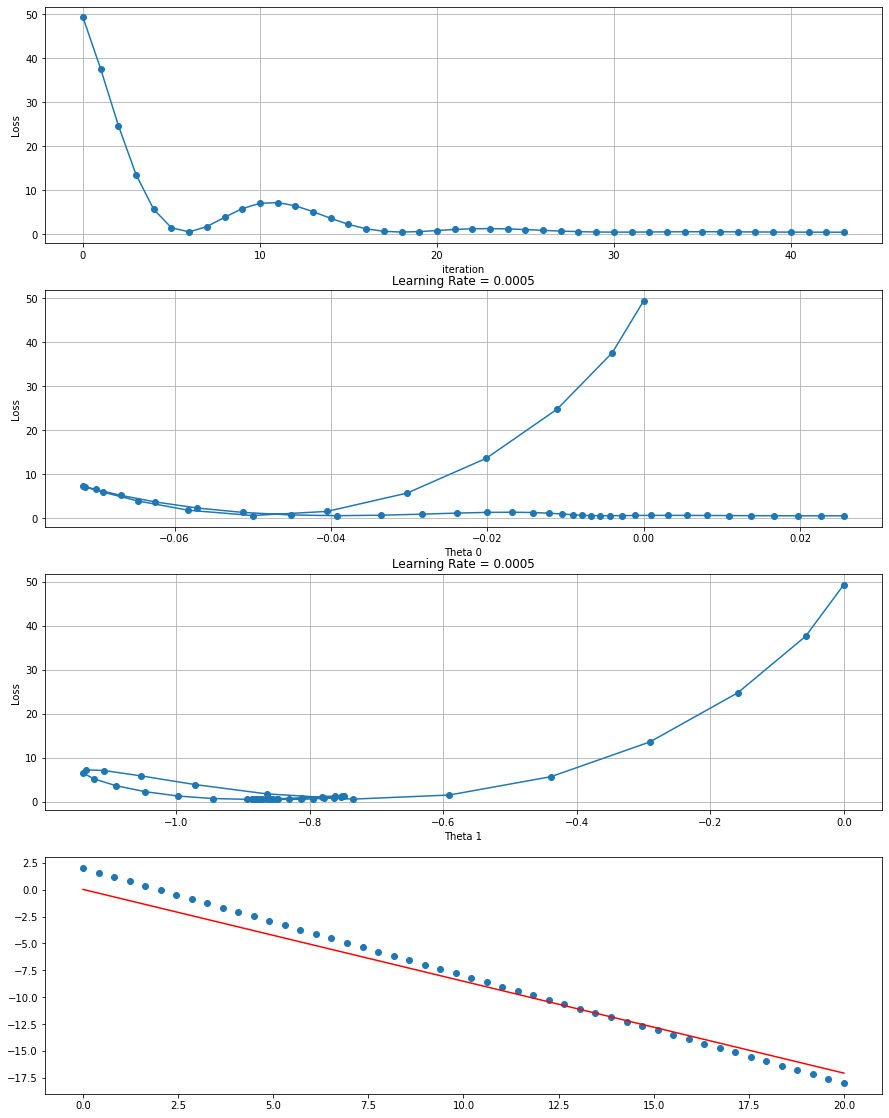

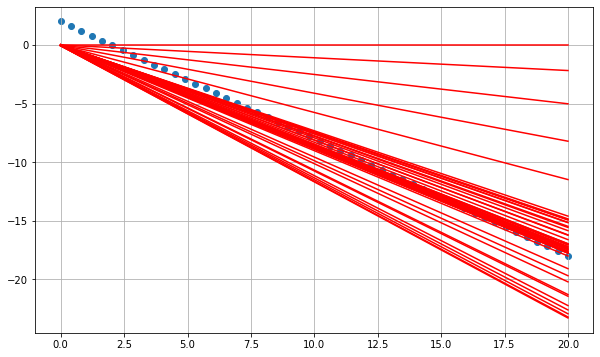

In [48]:
plot_visuals(loss, theta_0s, theta_1s)
plt.figure(figsize=(10,6))
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx,'r')
    plt.grid(True);

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [49]:
loss, theta_0s, theta_1s, h_xs = MomentumNAG_GD_SingleVariable(X, y, alpha=0.0005, gamma=0.89, max_num_iterations=300)

****************** Training Report ********************
Gradient Descent converged after 31 iterations
theta_0_Opt :  -0.007521273841603335
theta_1_Opt :  -0.8454353025385452
Cost =  0.5214565658709437


In [50]:
h_x = theta_0s[-1] + theta_1s[-1]*X
r2_score(h_x, y)

0.9579732049474448

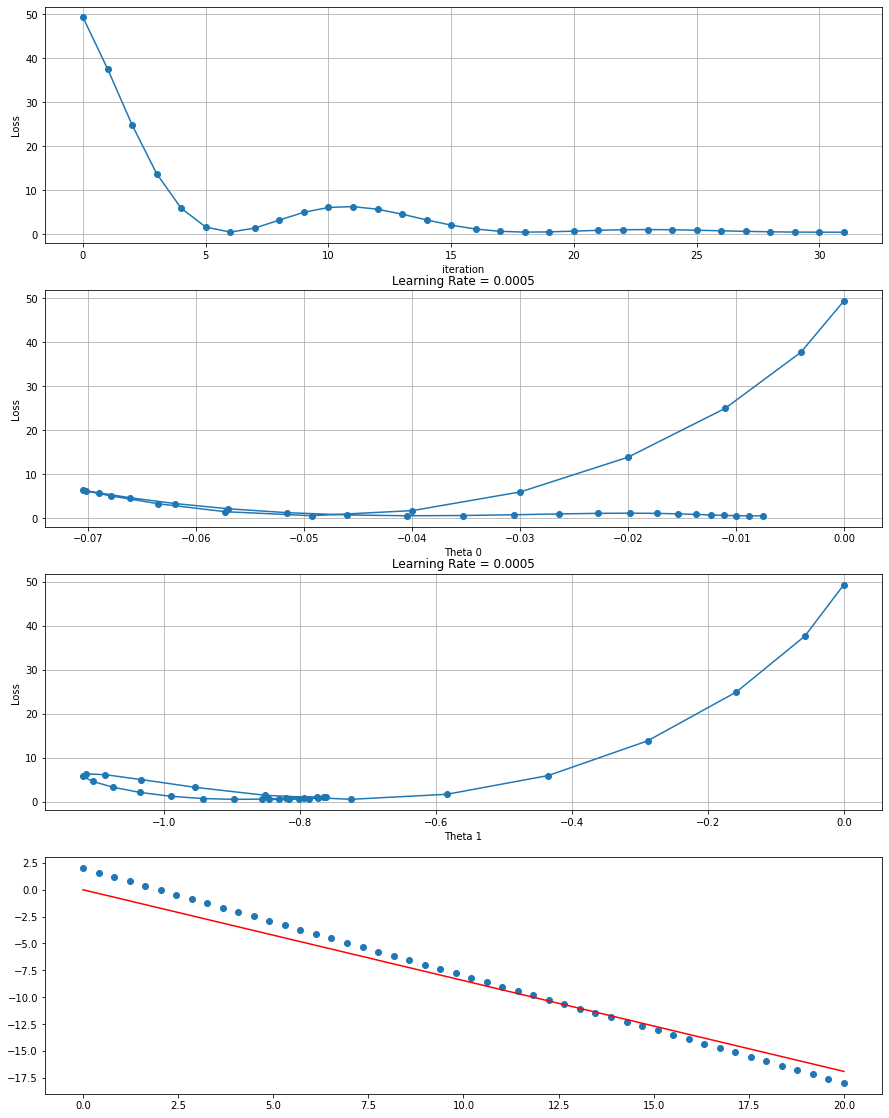

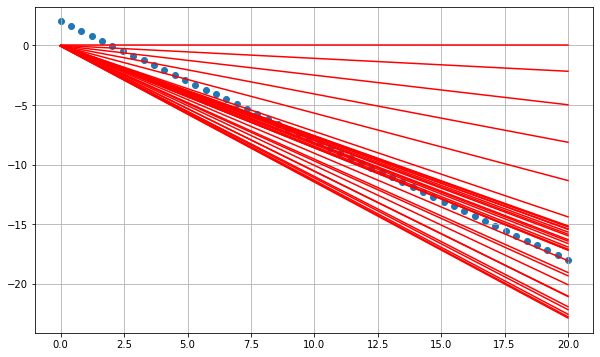

In [51]:
plot_visuals(loss, theta_0s, theta_1s)
plt.figure(figsize=(10,6))
plt.scatter(X, y)
for hx in h_xs:
    plt.plot(X, hx,'r')
    plt.grid(True);